# Equação Diferencial Ordinária (EDO)

São equações com derivadas ordinárias em relação as variáveis dependentes.

## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Entradas

In [2]:
exp = '-1.2 * y + 7 * np.e ** (-0.3 * x)'
x0 = 0.0
y0 = 3.0
h = 0.5
n = 20
g = lambda x,y: eval(exp)

## Método de Euler

O Método de Euler usa uma inclinação constante para aproximar pontos na função.

In [3]:
def euler(g, x0, y0, h, n):
  x = np.zeros(n + 1)
  y = np.zeros(n + 1)
  x[0] = x0
  y[0] = y0

  for i in range(n):
      y[i + 1] = y[i] + h * g(x[i], y[i])
      x[i + 1] = x[i] + h

  return x, y

xEuler, yEuler = euler(g, x0, y0, h, n)
saida = yEuler[n]
print(f'{saida:.3f}')

0.378


## Método de Heun

O Método de Heun é uma modificação de Euler, diferente de Euler, Heun calcula a média da inclinação para cada ponto.

In [4]:
def heun(g, x0, y0, h, n):
  x = np.zeros(n + 1)
  y = np.zeros(n + 1)
  x[0] = x0
  y[0] = y0

  for i in range(1, n+1):
    k1 = h * g(x[i-1], y[i-1])
    k2 = h * g(x[i-1] + h, y[i-1] + k1)
    y[i] = y[i-1] + 0.5 * (k1 + k2)
    x[i] = x[i-1] + h

  return x, y

xHeun, yHeun = heun(g, x0, y0, h, n)
saida = yHeun[n]
print(f'{saida:.3f}')

0.391


## Método do Ponto Médio

O Método do Ponto Médio é parecido com o de Heun, a diferença é que esse método calcula duas inlcinações. A primeira inclinação é similar de Heun e a segunda inclinação é calculada no ponto médio do intervalo.

In [5]:
def pontomedio(g, x0, y0, h, n):
  x = np.zeros(n + 1)
  y = np.zeros(n + 1)
  x[0] = x0
  y[0] = y0

  for i in range(n):
      k1 = y[i] + (h / 2) * g(x[i], y[i])
      k2 = x[i] + (h / 2)
      y[i + 1] = y[i] + h * g(k2, k1)
      x[i + 1] = x[i] + h

  return x, y

xPontoMedio, yPontoMedio = pontomedio(g, x0, y0, h, n)
saida = yPontoMedio[n]
print(f'{saida:.3f}')

0.390


## Métodos de Runge Kutta

Os métodos de Runge Kutta são métodos ordinários que buscam aprimorar os métodos anteriores para Equações Diferenciais Ordinárias. Foi visto que quanto mais inclinações (derivadas) fossem calculadas melhor seria a precisão do resultado. Sendo cada inclinação associada a um determinado coeficiente de compensação.

In [6]:
# método do Runge-Kutta de ordem 4
def rk4(g, x0, y0, h, n):
  x = np.zeros(n + 1)
  y = np.zeros(n + 1)
  x[0] = x0
  y[0] = y0

  for i in range(1, n+1):
    k1 = h * g(x[i-1], y[i-1])
    k2 = h * g(x[i-1] + h/2, y[i-1] + k1/2)
    k3 = h * g(x[i-1] + h/2, y[i-1] + k2/2)
    k4 = h * g(x[i-1] + h, y[i-1] + k3)
    y[i] = y[i-1] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    x[i] = x[i-1] + h

  return x, y

xRK4, yRK4 = rk4(g, x0, y0, h, n)
saida = yRK4[n]
print(f'{saida:.3f}')

0.387


## Comparação dos Métodos

0.387


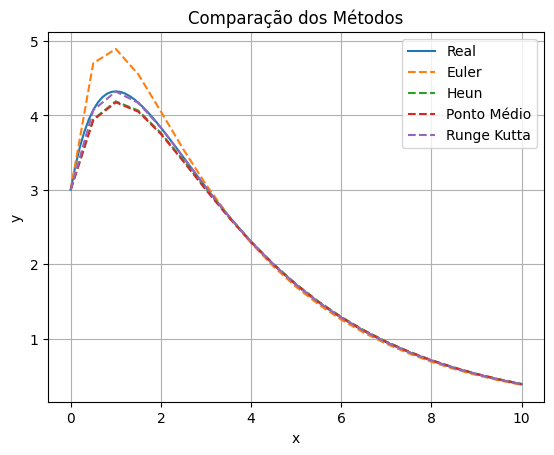

In [7]:
def f(x):
  return ((70 / 9) * np.e ** (-0.3 * x)) - ((43 / 9) * np.e ** (-1.2 * x))

x = np.linspace(0, 10, 100)
y = f(x)
print(f'{y[-1]:.3f}')

plt.plot(x, y, '-', label='Real')
plt.plot(xEuler, yEuler, '--', label='Euler')
plt.plot(xHeun, yHeun, '--', label='Heun')
plt.plot(xPontoMedio, yPontoMedio, '--', label='Ponto Médio')
plt.plot(xRK4, yRK4, '--', label='Runge Kutta')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparação dos Métodos')
plt.grid(True)
plt.legend()
plt.show()